In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook
import ipywidgets as widgets
import IPython.display as display

## Airfoils and lift

Recall that around an object in an irrotational flow the lift is given by

$$L = \rho U \Gamma$$

where $U$ is the free-stream velocity, and $\Gamma$ is the circulation around the object.  

In [2]:
# airfoils:
def plotAirfoil(ax,offset=0,a=1.2,b=1.):
    th = np.arange(0.,np.pi*2,0.001)
    R=a+1j*0.
    zeta = R*np.exp(1j*th)+offset
    zetaCylinder=zeta
    Zfoil = zeta+b**2/zeta
    ax.plot(np.real(Zfoil),np.imag(Zfoil),'b')
    ax.plot(np.real(zeta),np.imag(zeta),'g')
    ax.plot(np.real(offset),np.imag(offset),'+g')
    ax.axhline(y=0.,ls='--',color='k')
    ax.axvline(x=0.,ls='--',color='k')
    ax.set_aspect(1.)
    # get beta:
    bb = np.where(np.diff(np.signbit(np.imag(zeta))))[0]
    try:
        ax.plot(np.real(zeta[bb[1]]),np.imag(zeta[bb[1]]),'s')
        ax.plot(np.real(Zfoil[bb[1]]),np.imag(Zfoil[bb[1]]),'s')
        beta = -np.arctan2(np.imag(zeta[bb[1]]-offset),np.real(zeta[bb[1]]-offset))
    except:
        beta=0.
    beta = np.arcsin(np.imag(offset)/a)
    ax.set_title(r'$\beta$'+ '= %1.2f degrees'%(beta*180./np.pi))
    return(beta,zetaCylinder,Zfoil)

## Zhukowski Airfoil

We can create an airfoil by going from the $\chi=\eta + i\zeta$ plane to the $z = x+iy$ plane using the Zhukoskwi transform:

$$ z = \zeta - \frac{b^2}{\zeta} $$

and back again using its inverse:

$$\zeta = \frac{z}{2}\pm \frac{1}{2}\left( z^2-4b^2 \right) $$

where $b$ is an arbitrary parameter.  

In [3]:
def plotFoil(axs, gammafac=0.,alpha=0.):
    
    # co-ordinates:
    b = 1.
    a = 1.2
    offset = -0.15+1j*0.1
    x = np.arange(-4.5,3.5,0.003)
    y = np.arange(-2.,4.,0.003)
    X,Y = np.meshgrid(x,y)
    R = np.sqrt(X**2+Y**2)
    Th = np.arctan2(Y,X)
    Th[Th<0]=Th[Th<0]+np.pi*2.
    Z = X+1j*Y
    U=1.
    ## zz is the cylander co-ordinates.  
    zz = (Z-offset)*np.exp(-1j*alpha*np.pi/180.)
    
    cnts=np.arange(-4.,4.,0.1)
    ax=axs[0]

    ## cylinder co-ordinates:
    zetaCylinder = a*np.exp(1j*np.arange(0.,np.pi*2.,0.01))+offset
    ## where the cylander crosses the x-axis:
    beta = np.arcsin(np.imag(offset)/a)
    # get the gamma necesary for the stagnation point to be at the tip of the airfoil, 
    # ie. where the cylader intersects the x axis.  gammafac is 1 if we want this to satisfy the Jukowski 
    # condition
    Gamma = 4*np.pi*U*a*np.sin(alpha*np.pi/180.+beta)*gammafac
    print(Gamma)
    
    # calculate W (psi = imag(W)) in the cylinader co-ordinate system:
    W = U*(zz+a**2/zz)+(0.+1j)/2./np.pi*np.log(zz/a)*Gamma
    Wcyl=W.copy()
    ############################
    # plot:
    ax.contour(x,y,np.imag(W),cnts,linewidths=1.4,colors='0.2')
    ax.set_aspect(1.)
    try:
        ax.plot(np.real(zetaCylinder[bb[1]]),np.imag(zetaCylinder[bb[1]]),'s')
    except:
        pass
    ax.plot(np.real(zetaCylinder),np.imag(zetaCylinder),'b')
    xx=50.*np.exp(1j*0.*np.pi/180.)
    ax.plot([-np.real(xx),np.real(xx)],[-np.imag(xx),np.imag(xx)],'--',color='0.4')
    ax.plot([np.imag(xx),-np.imag(xx)],[-np.real(xx),np.real(xx)],'--',color='0.4')
    ax.plot(np.real(offset),np.imag(offset),'bx')
    # plot the equator of cylander:
    aa = a*(np.array([-1.+0.*1j,0.+0.*1j,1.+0.*1j]))*np.exp(1j*alpha*np.pi/180.)+offset
    print(aa)
    ax.plot(np.real(aa),np.imag(aa),'b')
    
    #######################################################
    ## get the result in the air-foil co-ordinates...
    ax=axs[1]
    # zeta is the inverse transform, so for each point in Z we can get a unique vaule in the zeta
    # plane:
    zeta = Z/2.+0.5*np.sqrt(Z**2-4*b**2)
    zeta[X<np.real(0.)] = Z[X<np.real(0.)]/2.-0.5*np.sqrt(Z[X<np.real(0.)]**2-4*b**2)
    zeta = (zeta-offset)*np.exp(-1j*alpha*np.pi/180)
    # get W in the cylinders co-ordinates:
    W = U*(zeta+a**2/(zeta))+1j/2./np.pi*np.log((zeta)/a)*Gamma
    W[np.abs(zeta)<a]=np.NaN+1j*np.NaN
    
    ############################
    # plot:
    # plot:
    Zfoil = zetaCylinder+b**2/zetaCylinder
    Wfoil = W.copy()
    ax.plot(np.real(Zfoil),np.imag(Zfoil))
    psi = np.imag(W)
    import matplotlib
    matplotlib.rcParams['contour.negative_linestyle']='solid'
    ax.contour(x,y,psi,cnts,linewidths=1.4,colors='0.2',)
    xx=50.*np.exp(1j*alpha*np.pi/180.)
    #ax.plot([-np.real(xx),np.real(xx)],[-np.imag(xx),np.imag(xx)],'--',color='0.4')
    #ax.plot([np.imag(xx),-np.imag(xx)],[-np.real(xx),np.real(xx)],'--',color='0.4')

    ax.set_xlim([-2.7,x[-1]])
    ax.set_ylim([-1.,1.45])
    ax.set_aspect(1.)
    axs[0].set_title(r'$\alpha = %1.2f; \  \Gamma = %1.2f \ \beta = %1.2f$'%(alpha,Gamma,beta*180./np.pi))
    return x,y,Wcyl,Wfoil,Gamma

<IPython.core.display.Javascript object>


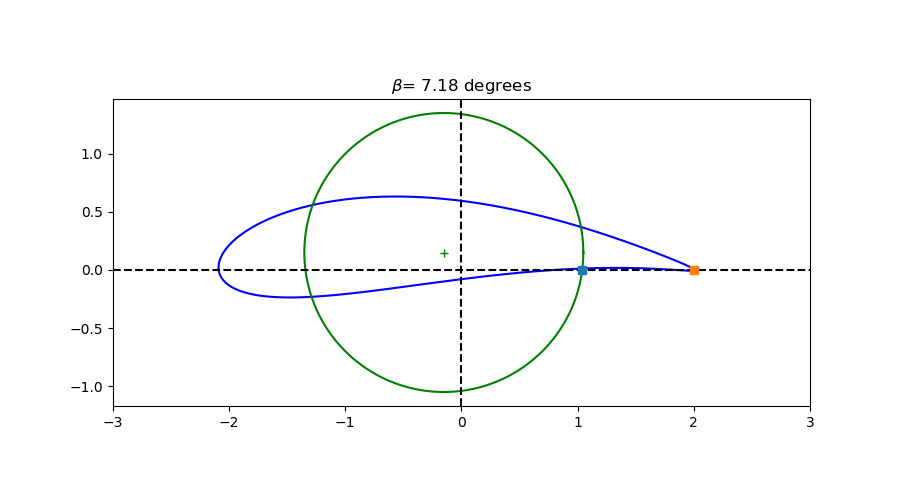

In [4]:
offset=-0.1+0.35*1j
#offset=0.0
fig,ax = plt.subplots(figsize=(9,5))
   
sx=widgets.FloatSlider(min=0.,max=1.,step=0.05)
sy=widgets.FloatSlider(min=0.,max=1.,step=0.05)
sa=widgets.FloatSlider(min=1.,max=2.,step=0.05)
ssx=widgets.HBox([widgets.Label('real(Q)   '),sx])
ssy=widgets.HBox([widgets.Label('imag(Q)   '),sy])
ssa=widgets.HBox([widgets.Label('radius    '),sa])
display.display(ssx)
display.display(ssy)
display.display(ssa)
offset = 0.+1j*0.
beta,zetaCylinder,zfoil = plotAirfoil(ax,offset,a=1.2)
def slideit(sender):
    global hhh
    ax.cla()
    offset = -sx.value+sy.value*1j
    beta,zetaCylinder,zfoil = plotAirfoil(ax,offset,a=sa.value)
    ax.set_xlim([-3.,3.])
    fig.show()
sx.observe(slideit)
sy.observe(slideit)
sa.observe(slideit)


<IPython.core.display.Javascript object>


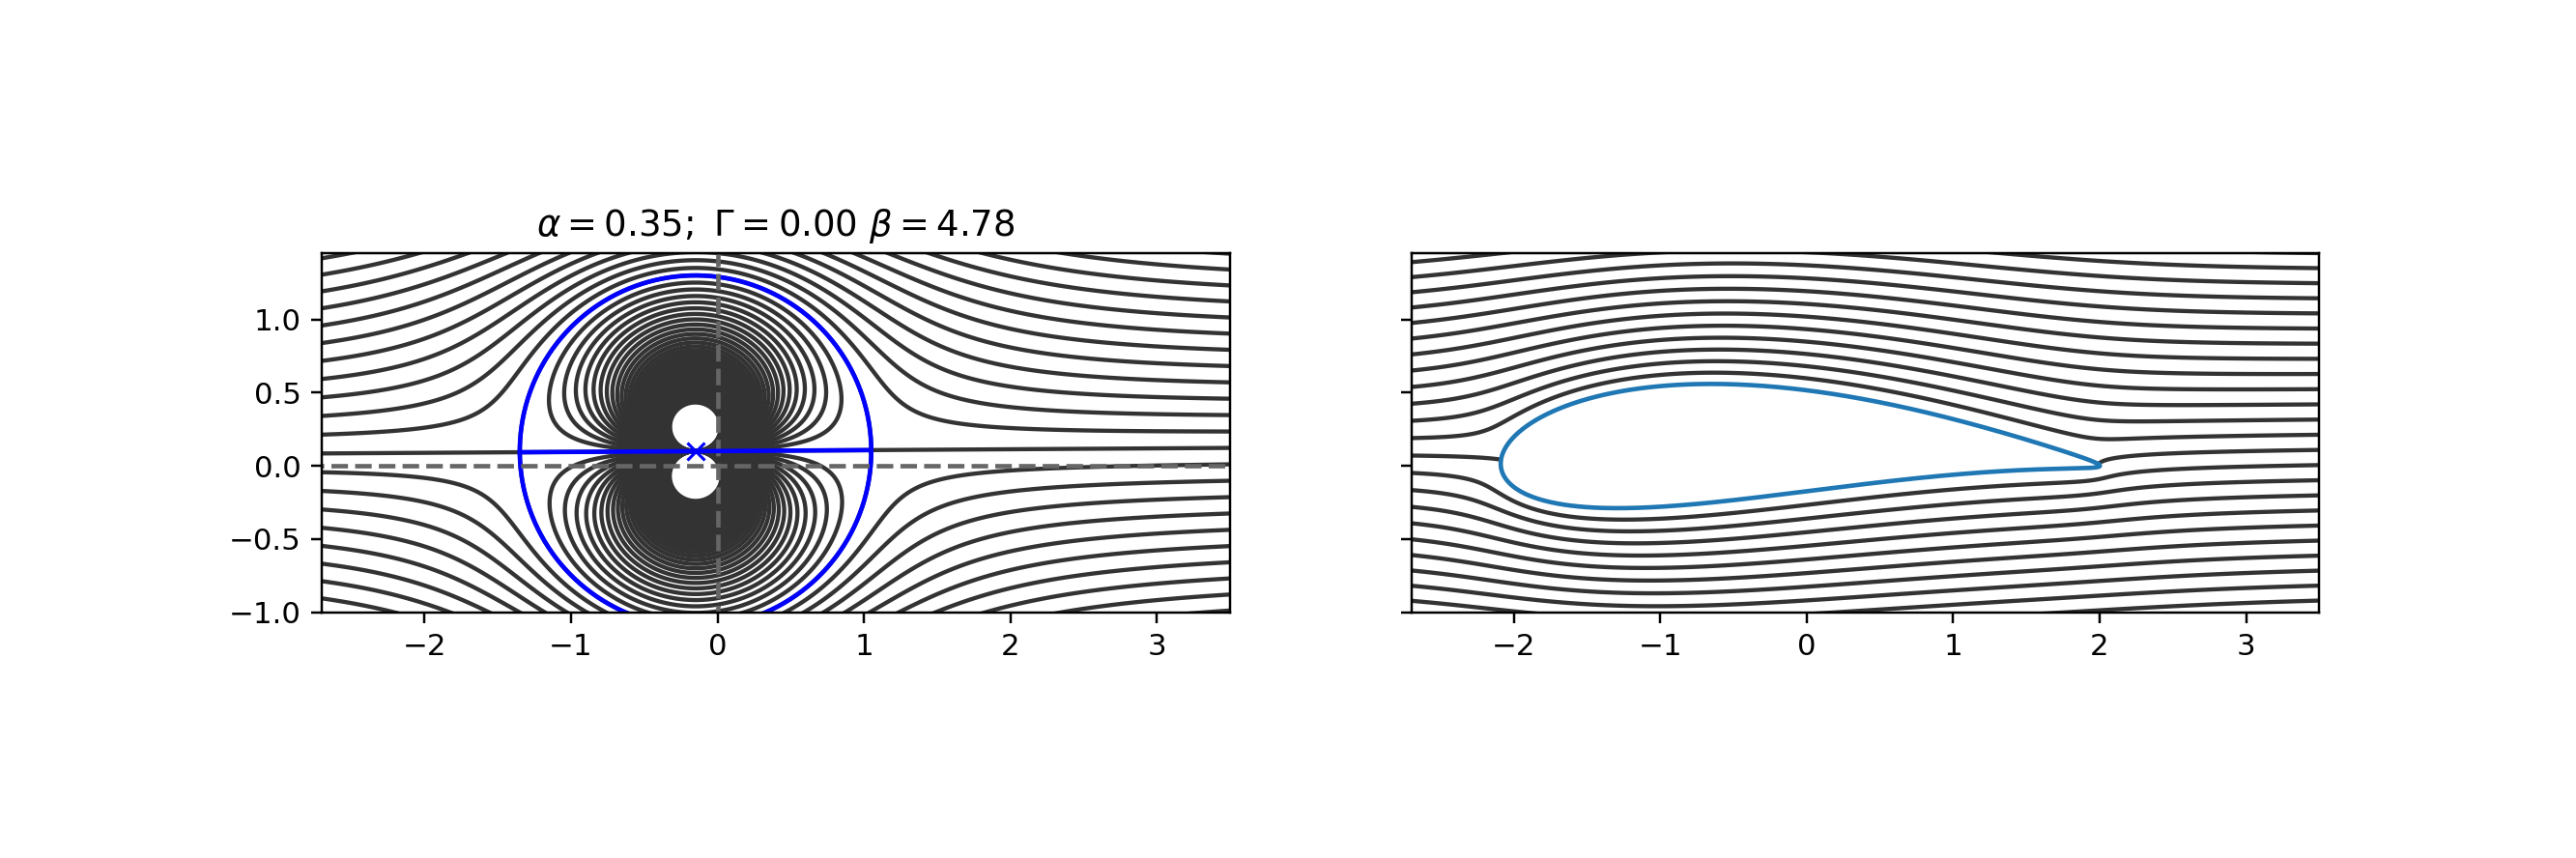

0.0
[-1.34997773+0.09268923j -0.15      +0.1j         1.04997773+0.10731077j]


<IPython.core.display.Javascript object>


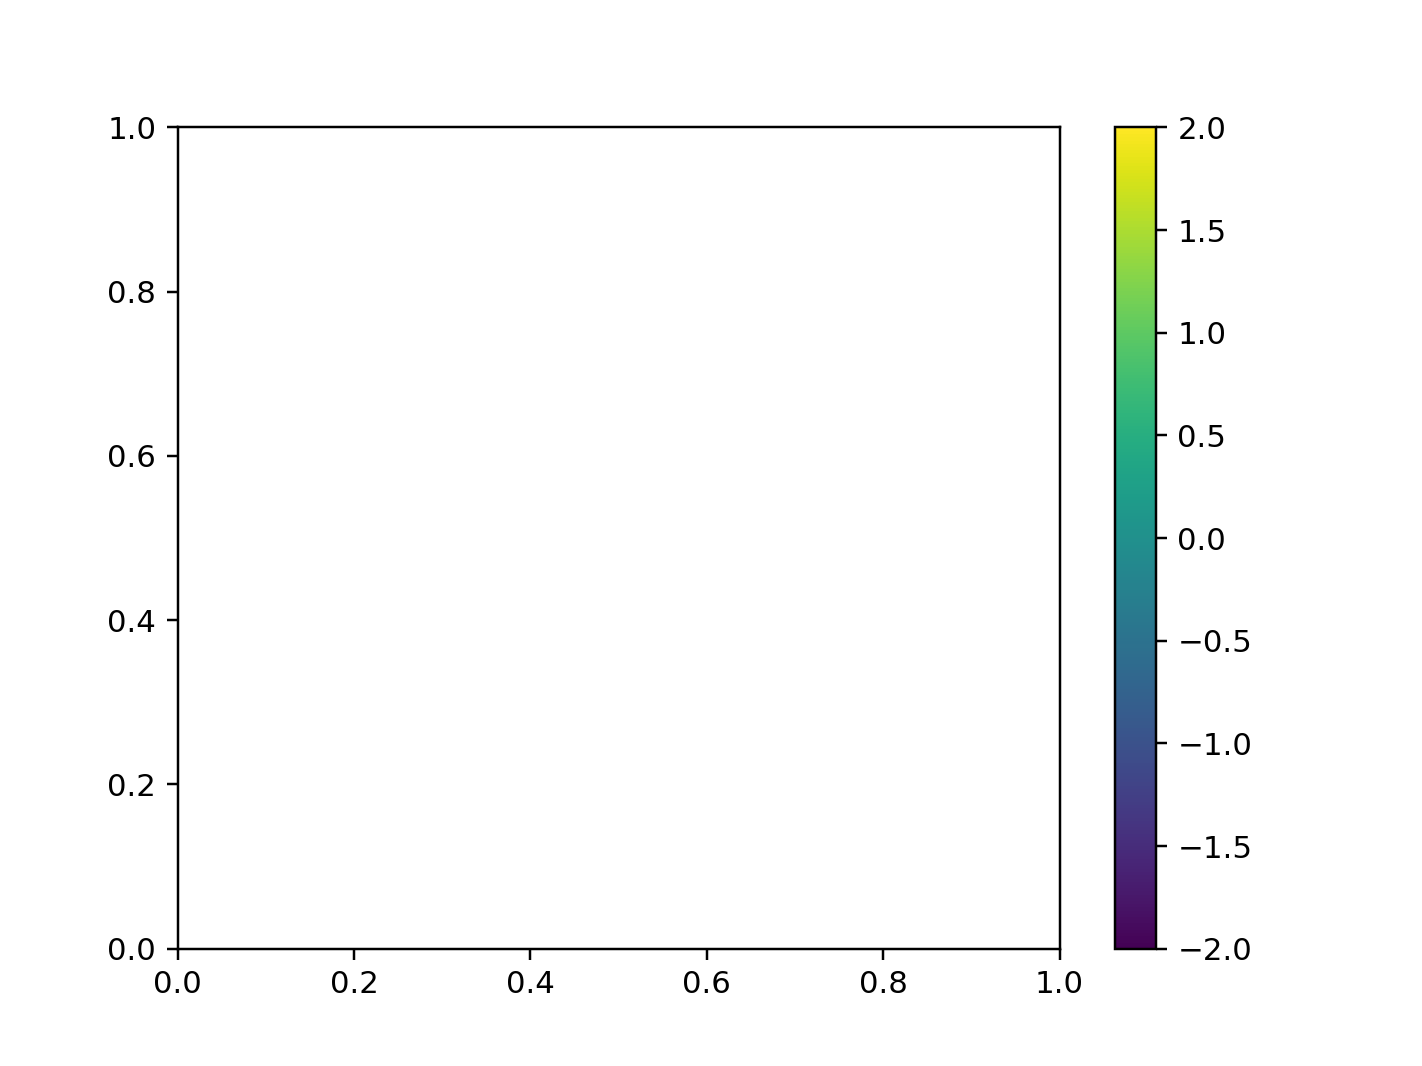

5.383701640513978
5.3721049087080335
$\rho \int (dw/dz)*2 dz$=0.0058
$\rho U \Gamma$ = 0.0000


/Users/jklymak/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in greater


In [8]:
for alpha in [20*np.pi/180]:
    fig,axs = plt.subplots(1,2,sharex=True,sharey=True,figsize=(12,4))

    axs=axs.flatten()

    x,y,Wcyl,Wfoil,Gamma=plotFoil(axs,gammafac=0.,alpha=alpha)
    fig.savefig('AirFoilFlow.pdf')

    # get the pressure:
    dwdz = np.diff(Wfoil,axis=1)/np.median(np.diff(x))
    fig,ax = plt.subplots()
    #pc=ax.pcolormesh(x,y,np.abs(dwdz)**2,rasterized=True,vmin=-2.,vmax=2.)
    fig.colorbar(pc,ax=ax)
    # integrate along the top edge
    top = 0.
    bot = 0.
    dz = np.median(np.diff(x))
    for i in range(len(x)-1):
        bad = np.where((np.isnan(dwdz[:,i]))|(np.abs(dwdz[:,i])>20.) )[0]
        if len(bad)>2:
            bot +=dz*np.abs(dwdz[bad[0]-1,i])**2
            top +=dz*np.abs(dwdz[bad[-1]+1,i])**2
    print(top)
    print(bot)
    print('$\\rho \\int (dw/dz)*2 dz$=%1.4f'% ((top-bot)/2.))
    print('$\\rho U \Gamma$ = %1.4f'%Gamma)   


## Lift?

<IPython.core.display.Javascript object>


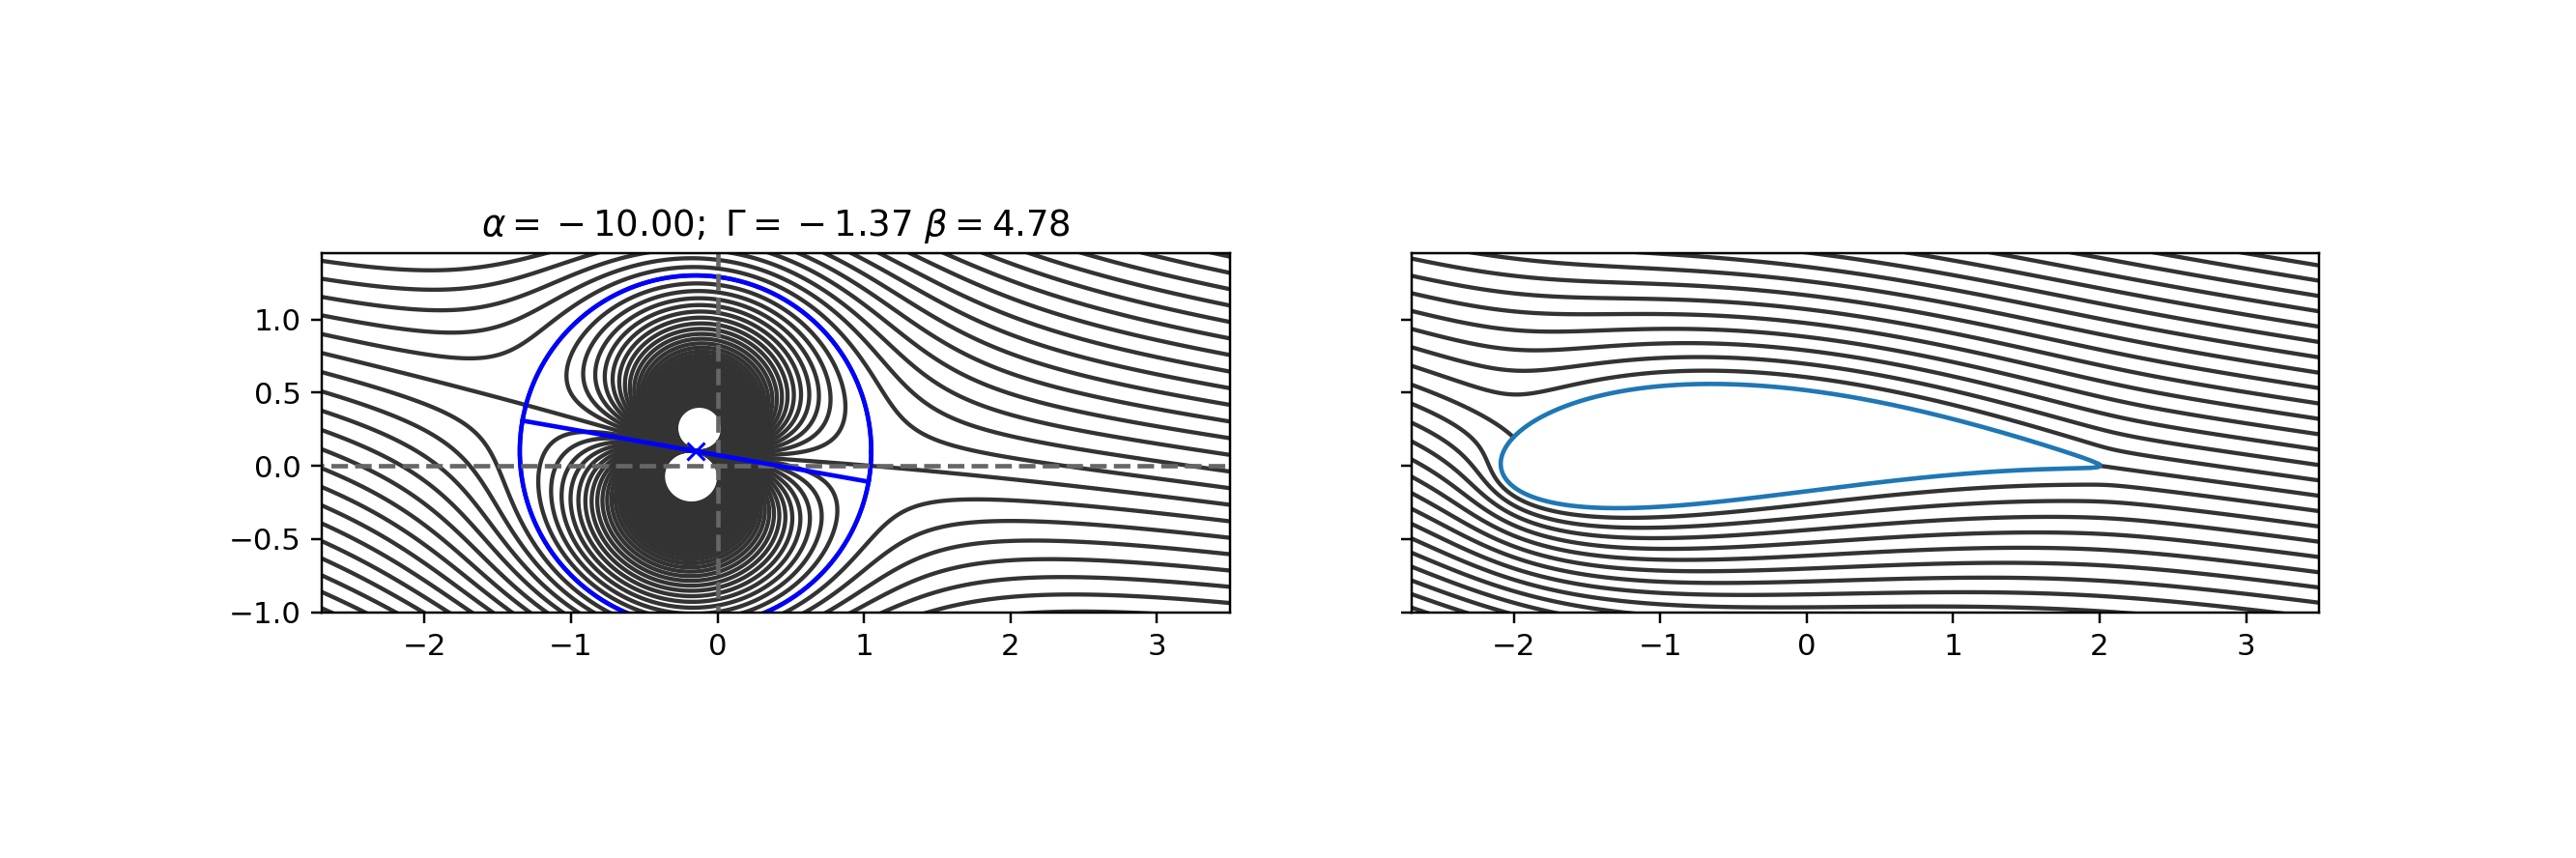

-1.3718988702260868
[-1.3317693+0.30837781j -0.15     +0.1j         1.0317693-0.10837781j]


<IPython.core.display.Javascript object>


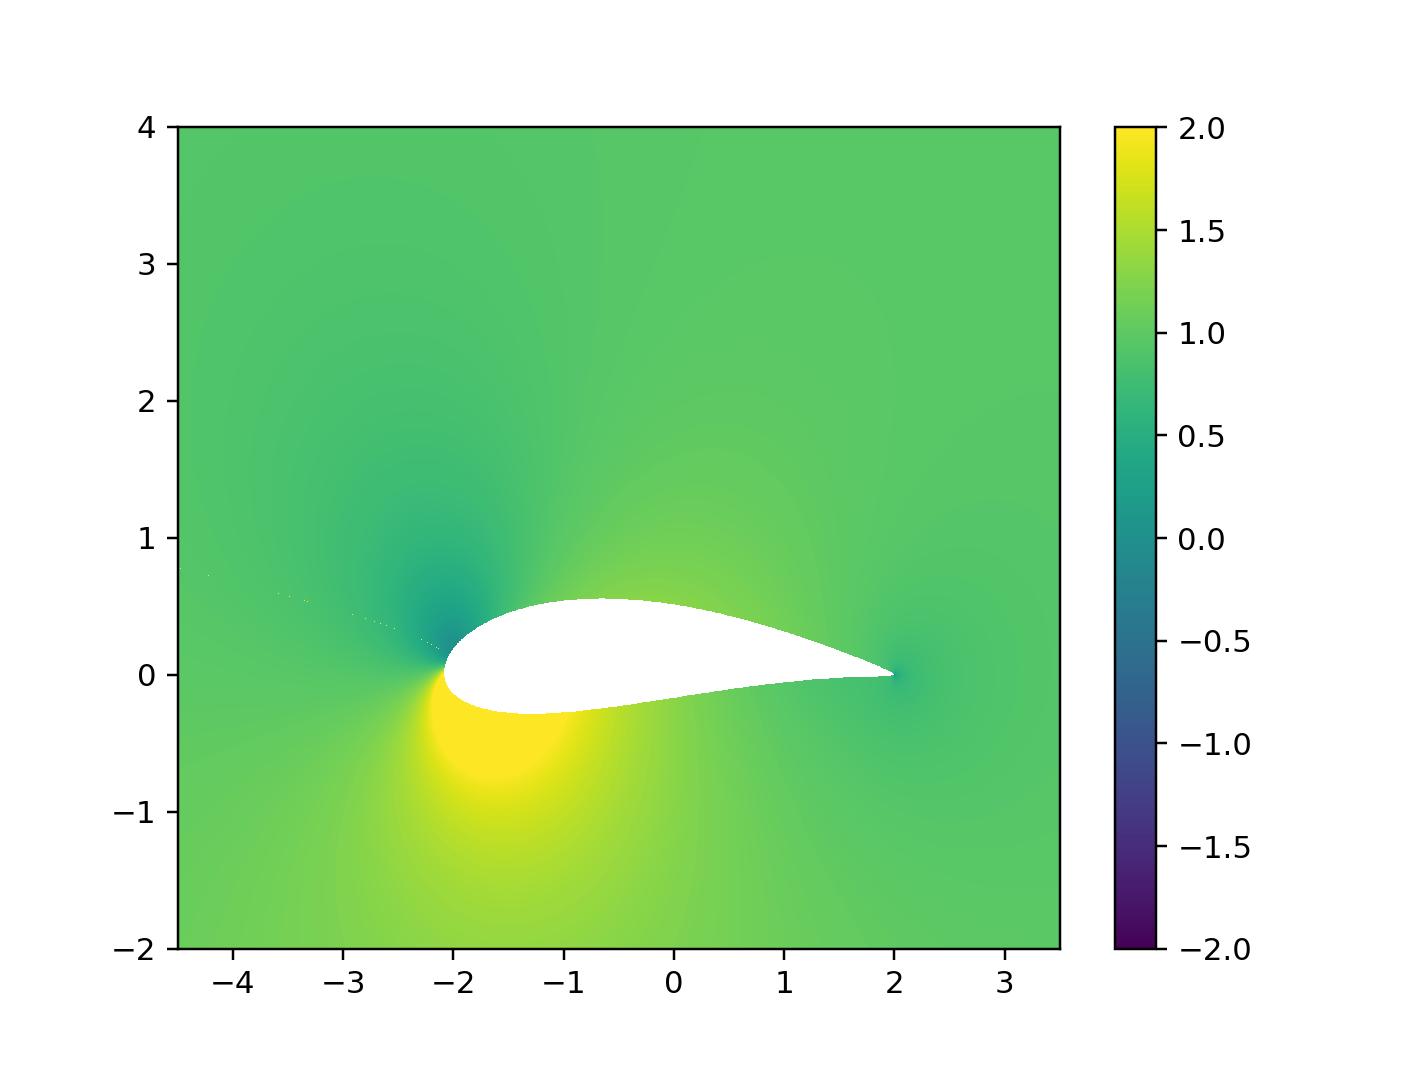

4.184171118953834
6.892374433311724
$\rho \int (dw/dz)*2 dz$=-1.3541
$\rho U \Gamma$ = -1.3719


/Users/jklymak/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


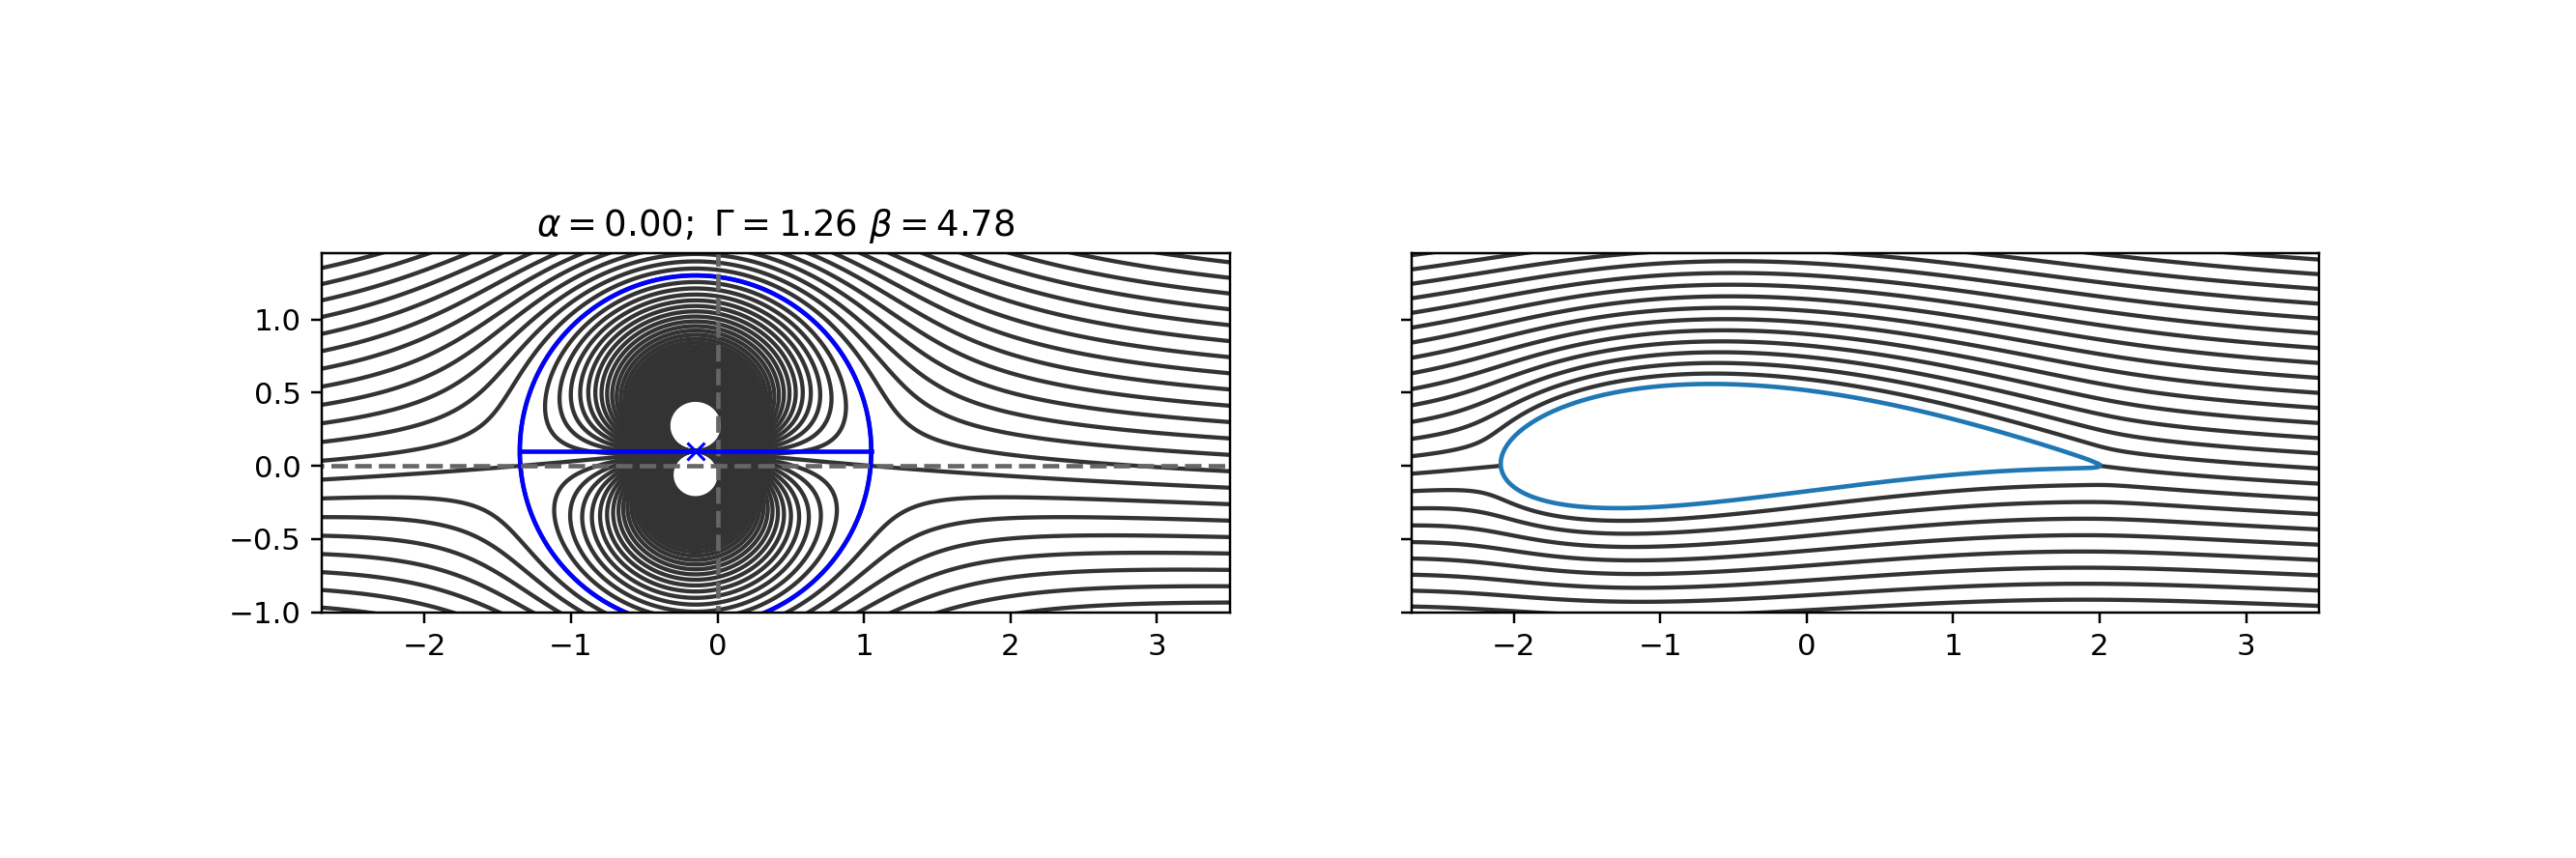

1.2566370614359175
[-1.35+0.1j -0.15+0.1j  1.05+0.1j]


<IPython.core.display.Javascript object>


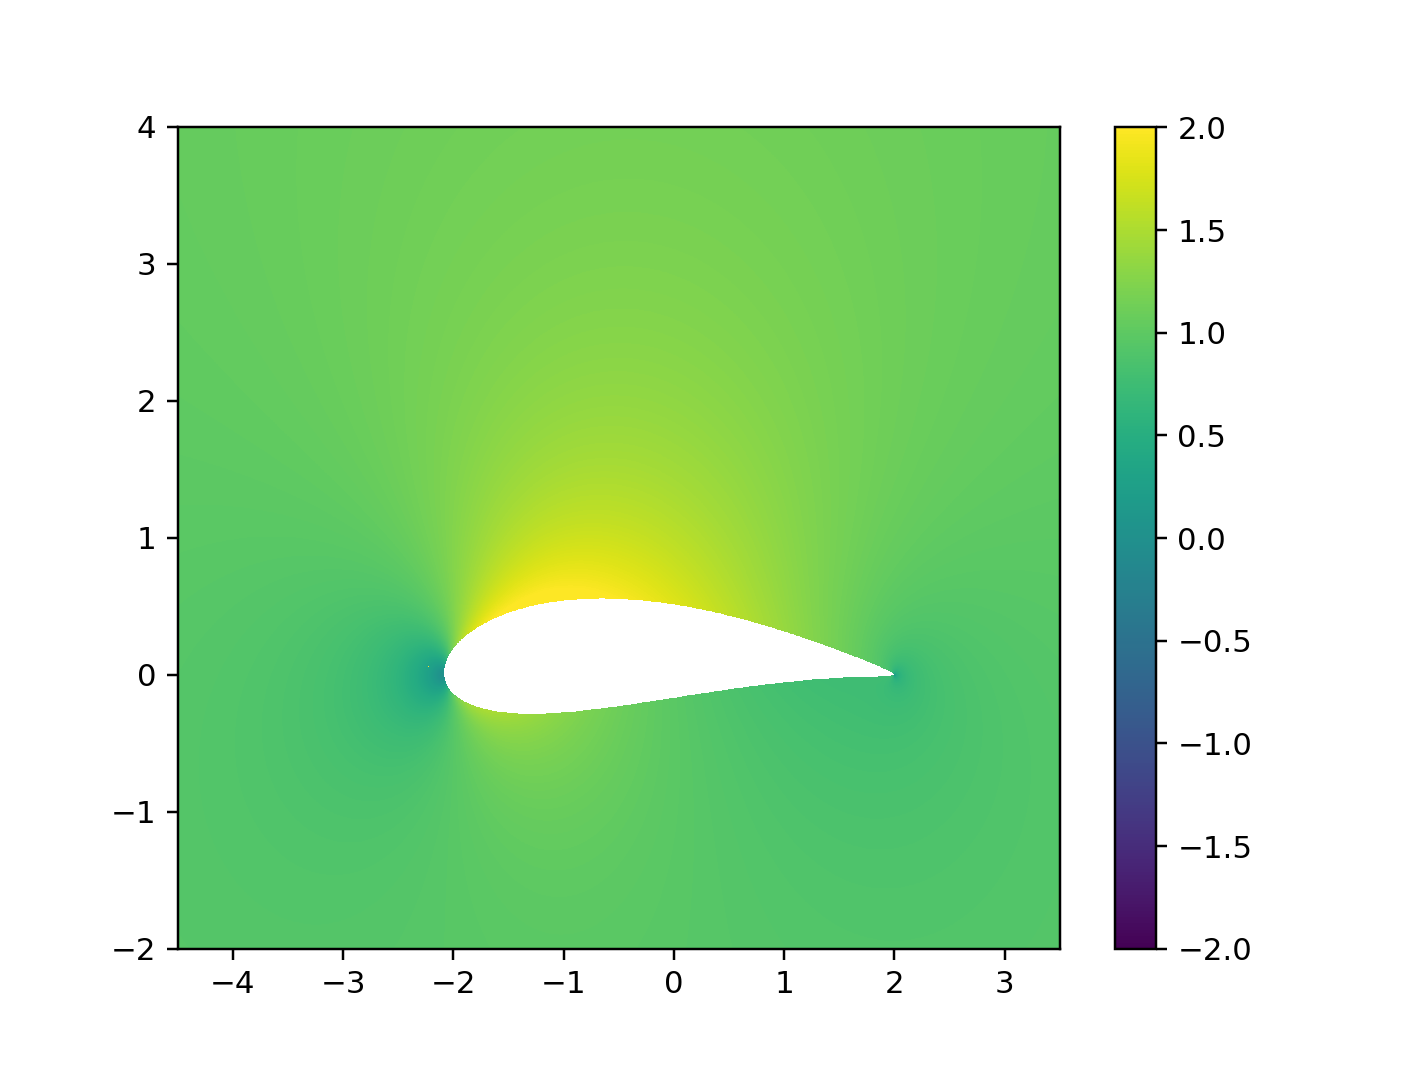

6.697247419962316
4.1857076907749535
$\rho \int (dw/dz)*2 dz$=1.2558
$\rho U \Gamma$ = 1.2566


<IPython.core.display.Javascript object>


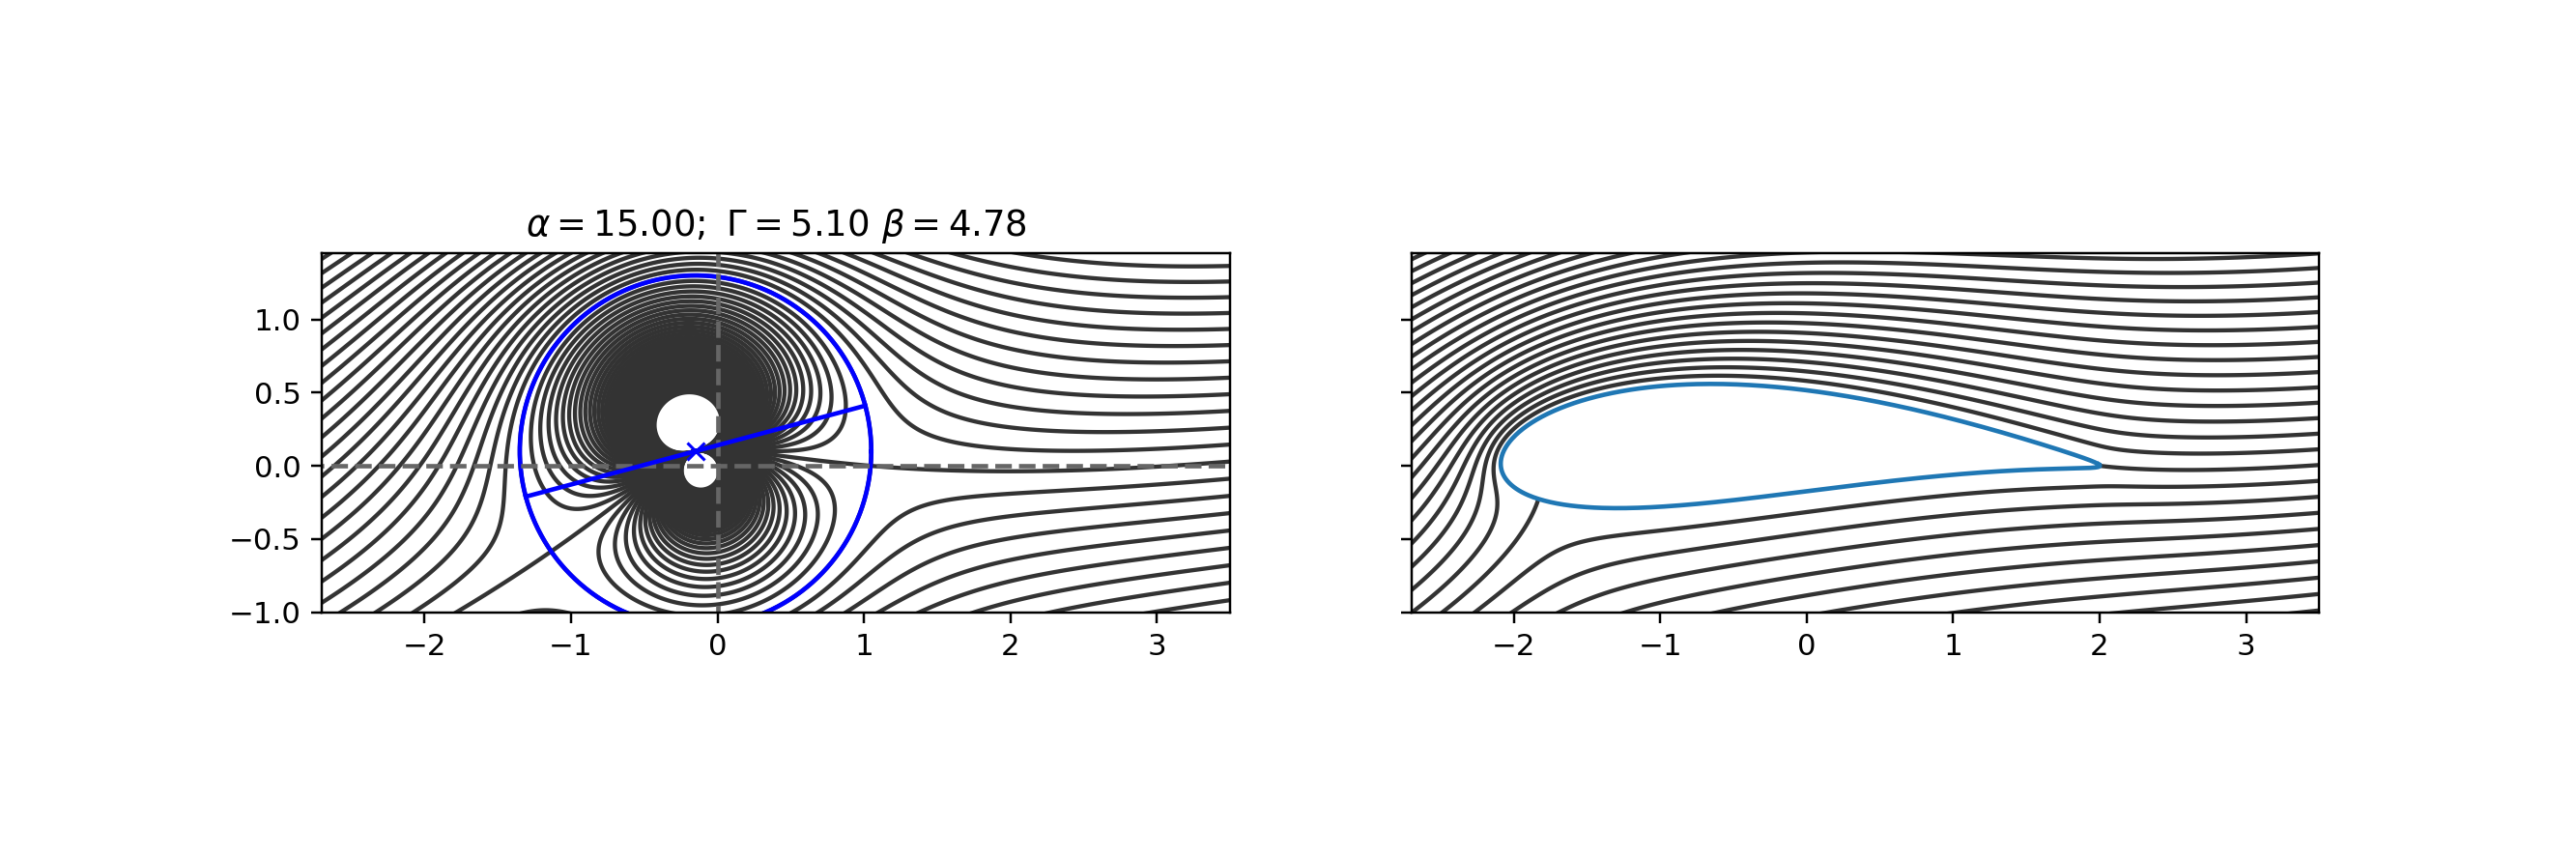

5.103142100413127
[-1.30911099-0.21058285j -0.15      +0.1j         1.00911099+0.41058285j]


<IPython.core.display.Javascript object>


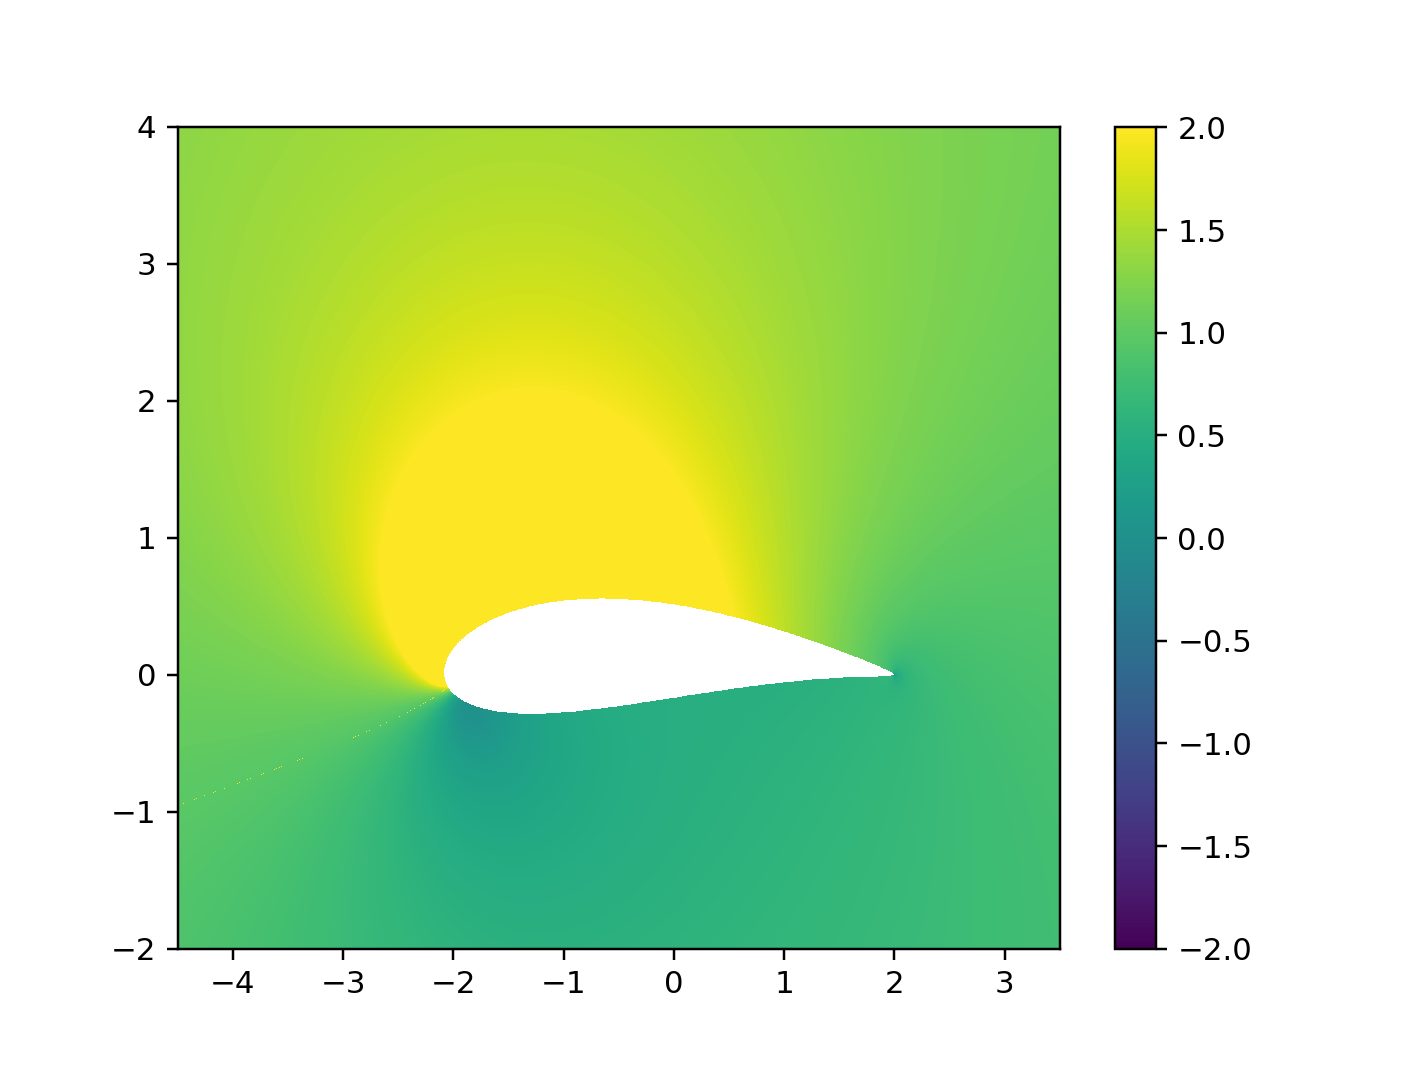

11.762862866664456
1.8740536303264546
$\rho \int (dw/dz)*2 dz$=4.9444
$\rho U \Gamma$ = 5.1031


In [9]:
for alpha in [-10.,0.,15.]:
    fig,axs = plt.subplots(1,2,sharex=True,sharey=True,figsize=(12,4))

    axs=axs.flatten()

    x,y,Wcyl,Wfoil,Gamma=plotFoil(axs,gammafac=1.,alpha=alpha)

    # get the pressure:
    dwdz = np.diff(Wfoil,axis=1)/np.median(np.diff(x))
    fig,ax = plt.subplots()
    pc=ax.pcolormesh(x,y,np.abs(dwdz)**2,rasterized=True,vmin=-2.,vmax=2.)
    fig.colorbar(pc,ax=ax)
    # integrate along the top edge
    top = 0.
    bot = 0.
    dz = np.median(np.diff(x))
    for i in range(len(x)-1):
        bad = np.where((np.isnan(dwdz[:,i]))|(np.abs(dwdz[:,i])>20.) )[0]
        if len(bad)>2:
            bot +=dz*np.abs(dwdz[bad[0]-1,i])**2
            top +=dz*np.abs(dwdz[bad[-1]+1,i])**2
    print(top)
    print(bot)
    print('$\\rho \\int (dw/dz)*2 dz$=%1.4f'% ((top-bot)/2.))
    print('$\\rho U \Gamma$ = %1.4f'%Gamma)   


## Math for stagnation point

We want the point at $\theta = \alpha+\beta$ to be a stagnation point.  We saw in class that the velocity around a cylander was given by:

$$ u_{\theta} = -2U\sin \theta - \frac{\Gamma}{2\pi a} $$

So in this case, we want to move the stagnation point from $\theta = \alpha$ down to the angle $-\beta$, so this means that 

From 6.45: 

$$ D-iL = \frac{i}{2}\rho \oint_{C} \left( \frac{dw}{dz} \right)^2 dl  $$

We need to calculate $dw/dz =\delta w / \delta x$ 

<IPython.core.display.Javascript object>


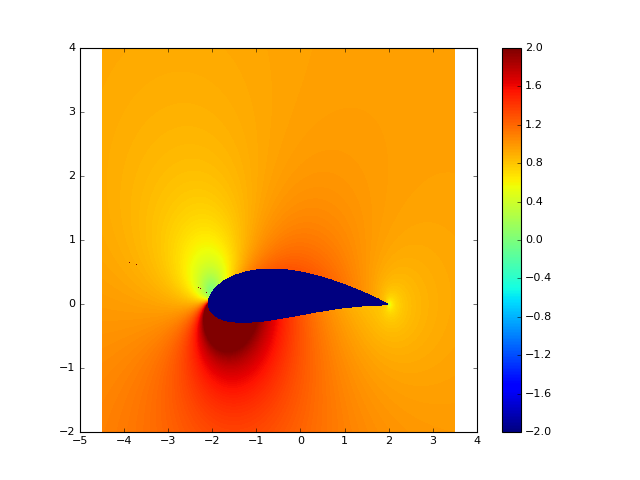

4.19651927543
6.89237443331
$\rho \int (dw/dz)*2 dz$=-1.3479
$\rho U \Gamma$ = -1.3719
